In [ ]:
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets


In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from torchvision import transforms

In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader

In [ ]:
class FaceDataset(Dataset):
  def __init__(self,image_dir,transform=None):
    self.image_dir=image_dir
    self.transform=transform
    self.image_filenames=sorted(os.listdir(self.image_dir))
  def __len__(self):
    return len(self.image_filenames)
  def __getitem__(self,idx):
    image_path=os.path.join(self.image_dir,self.image_filenames[idx])
    image=Image.open(image_path).convert('L')
    if self.transform:
      image=self.transform(image)
    return image

In [ ]:
transform1=transforms.Compose([transforms.Resize((128,128),interpolation=Image.NEAREST),
                              transforms.ToTensor(),
                              transforms.Normalize(mean=[0.5],std=[0.5])])

data_dir='/content/drive/MyDrive/img_align_celeba'

In [ ]:
train_data=FaceDataset(image_dir=data_dir,transform=transform1)

In [ ]:
total_data=len(train_data)
print(total_data)

1000


In [ ]:
# train_data=datasets.MNIST(root='./data',train=True,download=True,transform=transform1)

In [ ]:
print(len(train_data[0]))
print(train_data[0].shape)
# print(train_data[0][1])
# print(train_data[0][0])
# print(train_data[0])

1
torch.Size([1, 128, 128])


In [ ]:
print(len(train_data))

1000


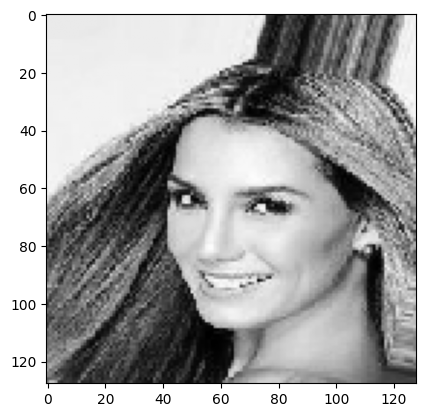

In [ ]:
# img=np.array(train_data[0][0].squeeze(0))
# print(train_data[0][1])
plt.imshow(train_data[0].squeeze(0),cmap='gray')

In [ ]:
from torch.utils.data import Dataset,DataLoader
train_dataloader=DataLoader(train_data,batch_size=64,shuffle=True)

In [ ]:
print(len(train_dataloader))

16


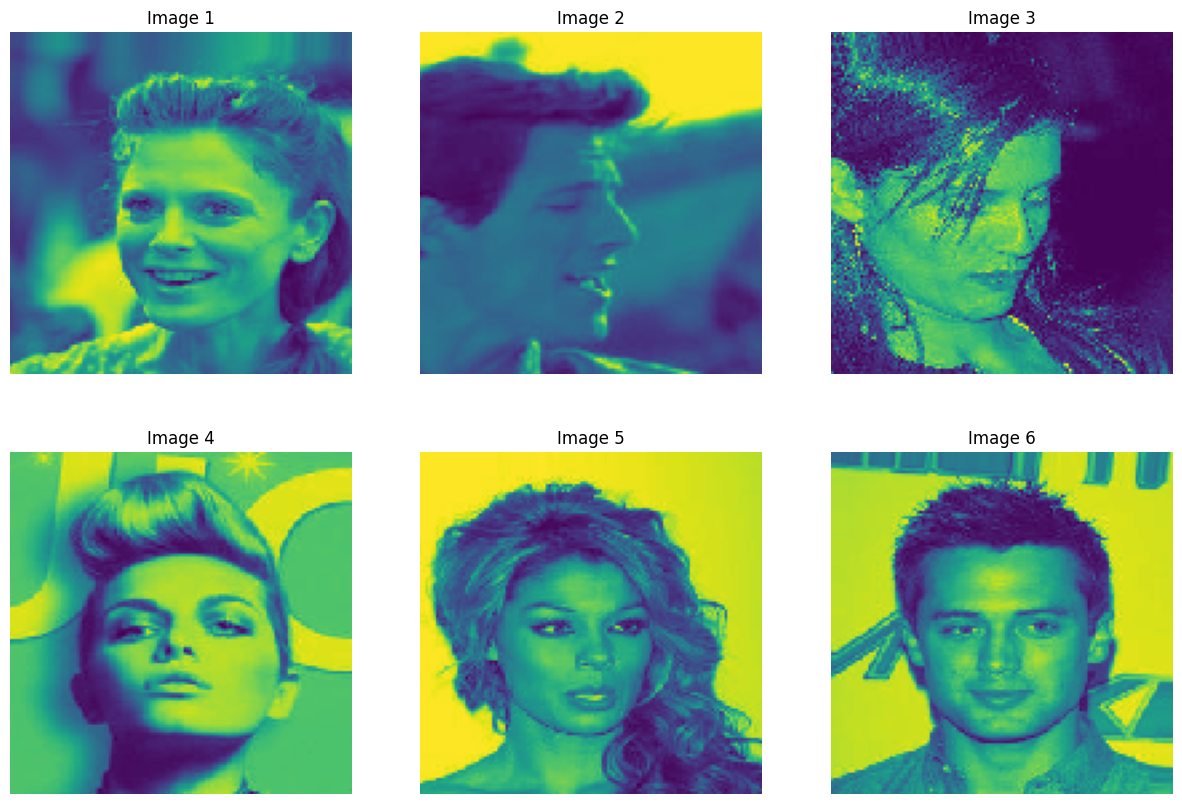

In [ ]:
plt.figure(figsize=(15,10))
for i in range(1,7):
  plt.subplot(2,3,i)
  plt.title(f'Image {i}')
  img=np.array(train_data[i].squeeze(0))
  plt.imshow(img)
  plt.axis('off')

In [ ]:
import torch.nn as nn
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.flatten = nn.Flatten()
    self.classifier = nn.Sequential(
      nn.Linear(128*128, 10000),
      nn.LeakyReLU(0.2, inplace = True),
      nn.Linear(10000, 1024),
      nn.LeakyReLU(0.2, inplace = True),
      nn.Linear(1024, 216),
      nn.LeakyReLU(0.2, inplace = True),
      nn.Linear(216, 1),
      nn.Sigmoid()
    )

  def forward(self, x):
    x = self.flatten(x)
    x = self.classifier(x)
    return x


In [ ]:
class Generator(nn.Module):
  def __init__(self):
    super(Generator,self).__init__()
    self.fc1=nn.Linear(100,1000)
    self.leaky=nn.LeakyReLU(0.2,inplace=True)
    self.fc2=nn.Linear(1000,5000)
    self.fc3=nn.Linear(5000,10000)
    self.fc4=nn.Linear(10000,128*128)
    self.tan=nn.Tanh()
  def forward(self,x):
    x=self.fc1(x)
    x=self.leaky(x)
    x=self.fc2(x)
    x=self.leaky(x)
    x=self.fc3(x)
    x=self.leaky(x)
    x=self.fc4(x)
    x=self.tan(x)
    return x


In [ ]:
model1=Discriminator()
model2=Generator()
model1.to(device)
model2.to(device)

Generator(
  (fc1): Linear(in_features=100, out_features=1000, bias=True)
  (leaky): LeakyReLU(negative_slope=0.2, inplace=True)
  (fc2): Linear(in_features=1000, out_features=5000, bias=True)
  (fc3): Linear(in_features=5000, out_features=10000, bias=True)
  (fc4): Linear(in_features=10000, out_features=16384, bias=True)
  (tan): Tanh()
)

In [ ]:
criterion=nn.BCELoss()

In [ ]:
import torch.optim as optim
optimizer1=optim.Adam(model1.parameters(),lr=0.0002)
optimizer2=optim.Adam(model2.parameters(),lr=0.0002)

In [ ]:
num_epochs=30
generator_loss=[]
discriminator_loss=[]

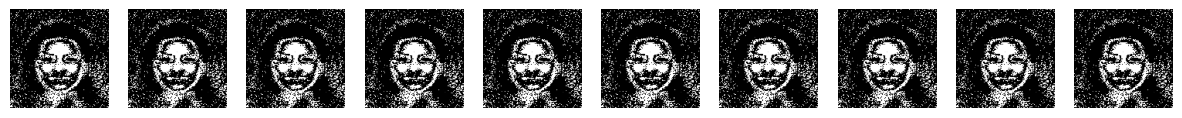

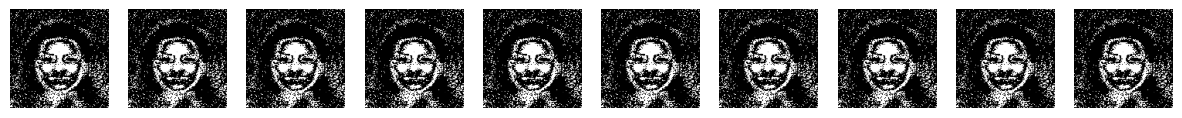

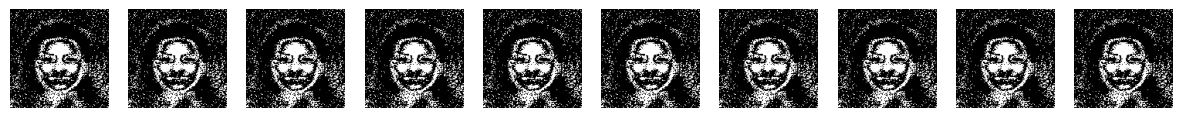

In [ ]:
for epoch in range(num_epochs):
  d_epoch_loss=0
  g_epoch_loss=0


  for i,(images) in enumerate(train_dataloader):
    real_labels=torch.ones(len(images),1).to(device)
    fake_labels=torch.zeros(len(images),1).to(device)
    images=images.to(device)
    # labels=labels.to(device)

    #Discriminator Training
    output=model1(images)
    d_real_loss=criterion(output,real_labels)
    real_score=output

    fake_image=model2(torch.randn(len(images),100).to(device))
    fake_image=fake_image.reshape(len(images),1,128,128)

    output=model1(fake_image)
    d_fake_loss=criterion(output,fake_labels)
    fake_score=output

    d_loss=d_real_loss+d_fake_loss
    d_epoch_loss+=d_loss.item()
    optimizer1.zero_grad()
    d_loss.backward()
    optimizer1.step()

    #Generation Training

    fake_images=model2(torch.randn(len(images),100).to(device))
    fake_images=fake_images.reshape(len(images),1,128,128)
    outputs=model1(fake_images)

    g_loss=criterion(outputs,real_labels)
    g_epoch_loss+=g_loss.item()

    optimizer2.zero_grad()
    g_loss.backward()
    optimizer2.step()

    if (i+1)%200==0:
      print(f'Epoch: [{epoch+1}/{num_epochs}] Batch/Steps: [{i+1}/{len(train_dataloader)}] Disc. Loss: {d_loss.item()} Gen. Loss:{g_loss.item()} D(x): {real_score.mean().item()} D(G(z)): {fake_score.mean().item()} ')

  generator_loss.append(g_epoch_loss/i)
  discriminator_loss.append(d_epoch_loss/i)


  if (epoch+1)%10==0:
    plt.figure(figsize=(15,10))
    for i in range(10):
      plt.subplot(1,10,i+1)
      img=fake_images[i,0].detach().cpu().numpy()
      plt.imshow(img,cmap='gray')
      plt.axis('off')

In [ ]:
!ls

drive  sample_data


In [ ]:
torch.save(model1,'/content/drive/MyDrive/discriminator_1.pt')
torch.save(model2,'/content/drive/MyDrive/generator_1.pt')

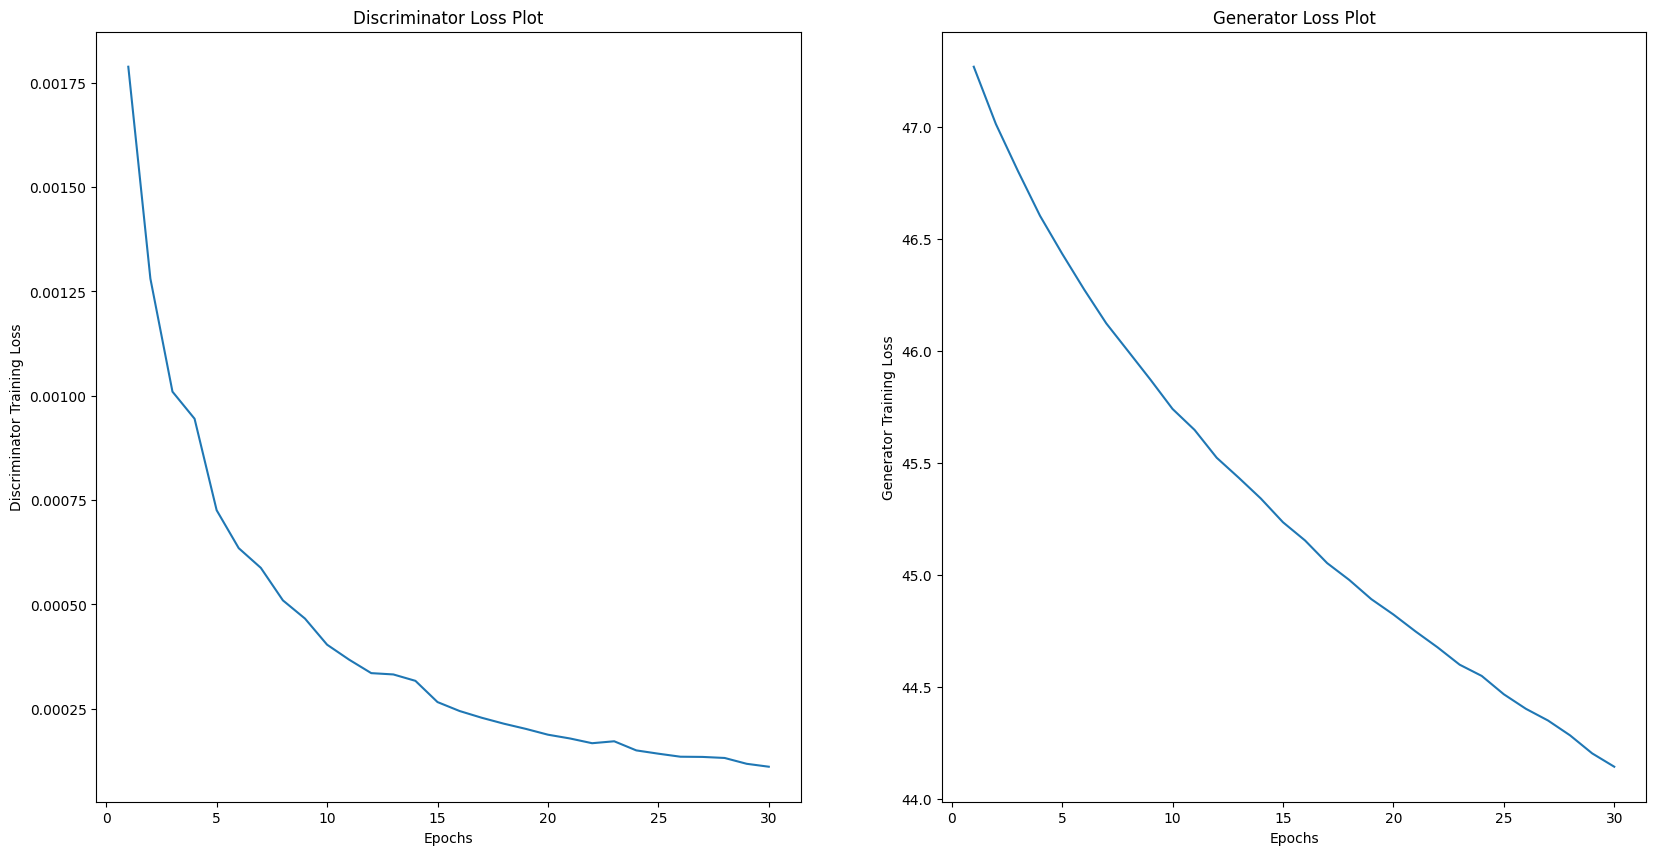

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Discriminator Loss Plot')
train_num_epoch=[i+1 for i in range(len(discriminator_loss))]
plt.plot(train_num_epoch,discriminator_loss)
plt.xlabel('Epochs')
plt.ylabel('Discriminator Training Loss')

plt.subplot(1, 2, 2)
plt.title("Generator Loss Plot")
train_num_epoch = [i + 1 for i in range(len(discriminator_loss))]
plt.plot(train_num_epoch, generator_loss)
plt.xlabel("Epochs")
plt.ylabel("Generator Training Loss")
plt.show()

# Inference

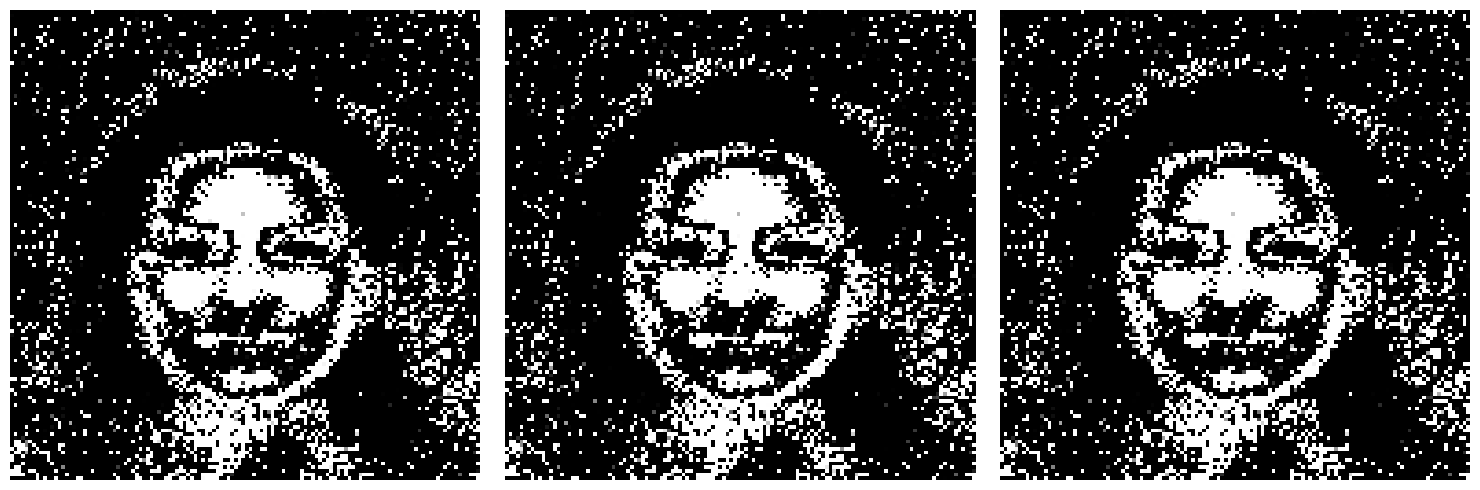

In [ ]:

from torch.serialization import add_safe_globals
from torch.nn import LeakyReLU
import matplotlib.pyplot as plt

add_safe_globals([nn.Linear, LeakyReLU])
generator = torch.load('/content/drive/MyDrive/generator_1.pt', weights_only=False,map_location=torch.device('cpu'))
generator.eval()

num_samples = 3
input_noise = torch.randn(num_samples, 100).to(device)
generated_samples = generator(input_noise)
generated_samples = generated_samples.reshape(num_samples, 1, 128, 128)

generated_samples_np = generated_samples.detach().cpu().numpy()
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(generated_samples_np[i, 0], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()
